In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import plotly as px


In [2]:
dfmovies= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\A-ETLconsignas\MoviesSMALL.csv')

In [3]:
#Me traigo DF que cree a partir del Dataset original luego del ETL y sin las columnas que desanide
dfmovies.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,release_year,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,1995.0,12.451801


In [4]:
# Aplico describe para la descripcion estadistica de los features basicos numericos 
dfmovies.describe()

,budget,id,popularity,revenue,runtime,release_year,return
count,4.493600e+04,44936.000000,44936.000000,4.493600e+04,44696.000000,44936.000000,1.087900e+04
mean,4.272523e+06,107770.449528,2.943997,1.133855e+07,94.315330,1991.819677,inf
std,1.751999e+07,112016.117651,6.027463,6.469487e+07,38.300509,24.072588,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26173.750000,0.394106,0.000000e+00,85.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59522.000000,1.138982,0.000000e+00,95.000000,2001.000000,1.280000e+00
75%,0.000000e+00,156598.500000,3.740277,0.000000e+00,107.000000,2010.000000,7.267949e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,2017.000000,inf


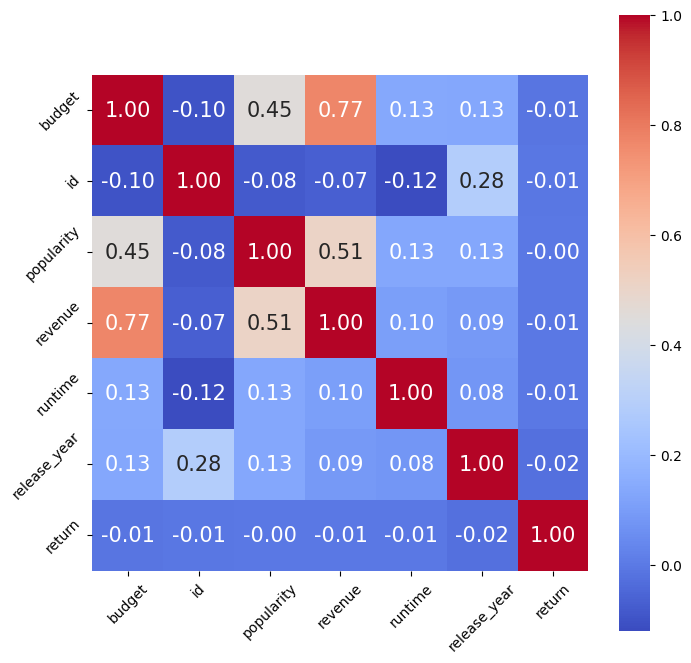

In [5]:
# Tomo solamente las variables numericas del DF que me quedo luego del ETL inicial y las coloco en un HEATMAP
# Para hacer matriz de correlacion entre variables
columnaselim=['overview','title', 'original_language', 'release_date']
#calcula la correlación entre todas las columnas numéricas restantes.
corr = dfmovies.drop(columns=columnaselim).corr()  
#establece el tamaño de la figura del mapa de calor
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= dfmovies.drop(columns = columnaselim).columns, 
           yticklabels= dfmovies.drop(columns = columnaselim).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Como conclusiones de este grafico podemos ver que las variables que mas correlacion positiva tienen son revenue y budget, que luego las graficaremos. En segundo lugar y bastante menos entre no tener correlacion y tener casi un 50% revenue y popularity

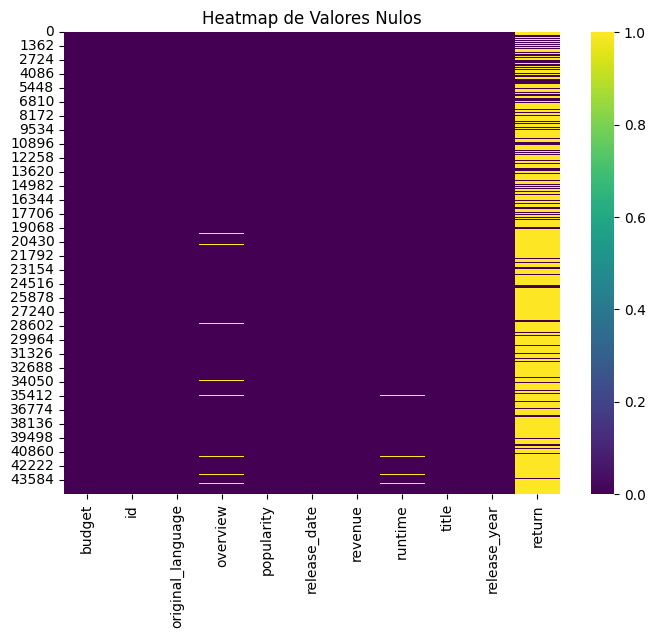

In [6]:
# Utilizo heat map tambien para ver valores nulos. En la columnsa que mas hay es en RETURN
plt.figure(figsize=(8, 6))  
sns.heatmap(dfmovies.isnull(), cmap='viridis') 
plt.title('Heatmap de Valores Nulos')  
plt.show()

In [7]:
# reemplazo nulos por cero
dfmovies1 = dfmovies.replace(np.nan,' ', regex=True)

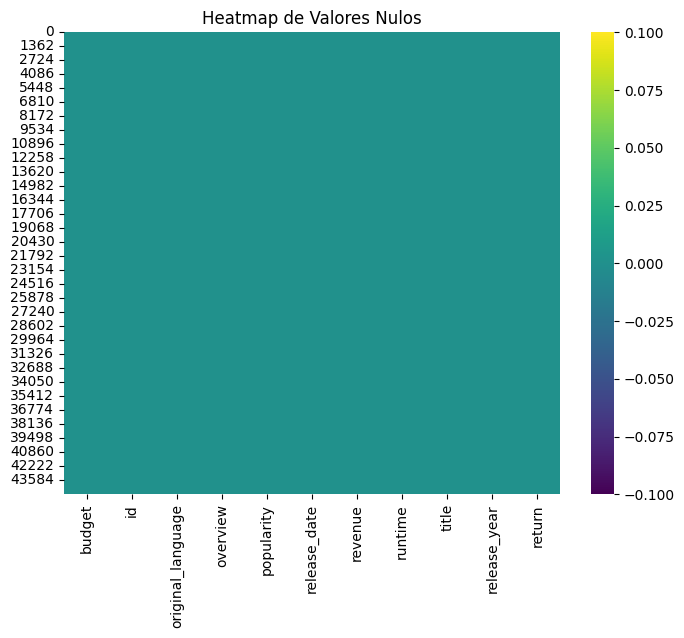

In [8]:
# Vuelvo a dibujar el heat map sin nulos
plt.figure(figsize=(8, 6))  
sns.heatmap(dfmovies1.isnull(), cmap='viridis') 
plt.title('Heatmap de Valores Nulos')  
plt.show()

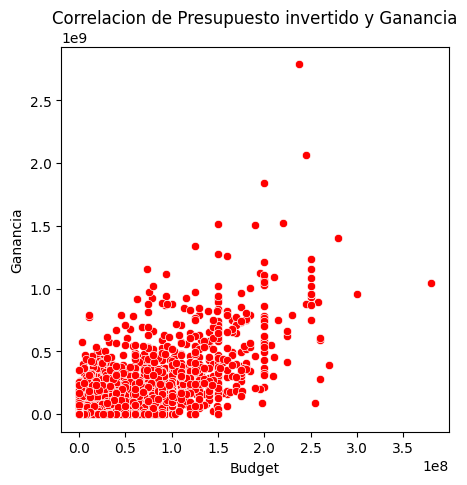

In [9]:
# Creo un scatterplot de la variable 'budget' asociada a 'revenue' 
plt.figure(figsize=(5,5))
sns.scatterplot(data=dfmovies, x='budget',y='revenue', color='red')

# Personalizar el gráfico
plt.title('Correlacion de Presupuesto invertido y Ganancia')
plt.xlabel('Budget')
plt.ylabel('Ganancia')

# Mostrar el gráfico
plt.show()

En terminos generales se puede inferir que a mas presupuesto invertido luego se obtuvo mas ganancia. 

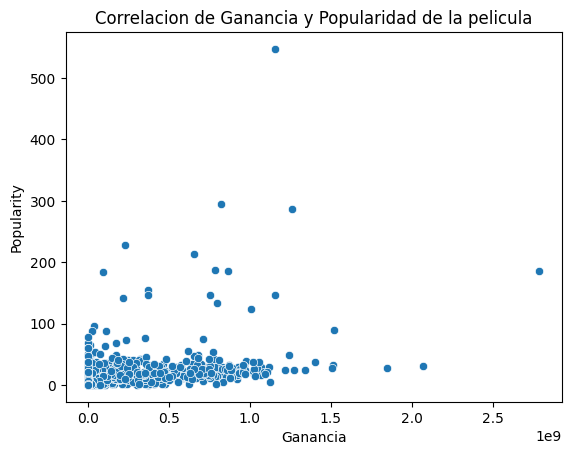

In [10]:
# Crear un scatterplot de la variable 'budget' asociada a 'popularity' 
sns.scatterplot(data=dfmovies, x='revenue',y='popularity')

# Personalizar el gráfico
plt.title('Correlacion de Ganancia y Popularidad de la pelicula')
plt.xlabel('Ganancia')
plt.ylabel('Popularity')

# Mostrar el gráfico
plt.show()

Vemos una correlacion escasa, pero la hay, que cuando mas popular fue la pelicula mas ganancia dio. 

ME FIJO LA RELACION ENTRE GENEROS Y POPULARIDAD

In [11]:
dfgeneros= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\GenerosPORid.csv')

In [12]:
## uno el dfmovies con el de generos para graficar los generos mas populares
union= pd.merge(dfmovies, dfgeneros, on='id', how='left')

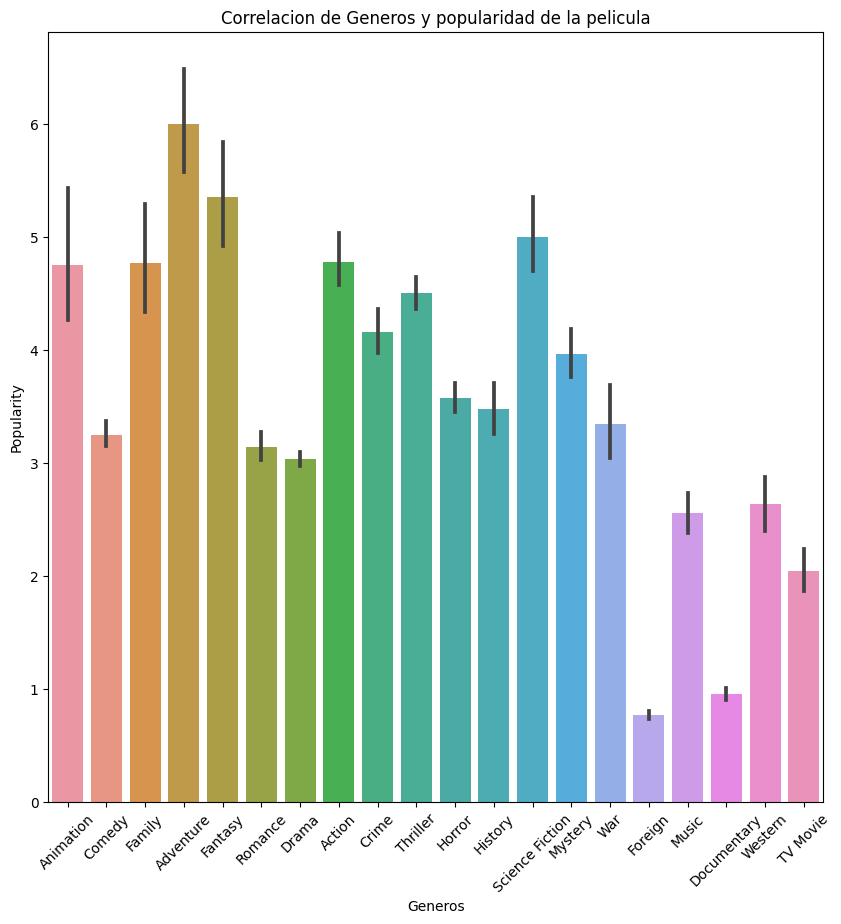

In [13]:
# Creamos un grafico de barras para ver la relacion entre la variable 'genero' asociada a 'popularidad' 
plt.figure(figsize=(10,10))
sns.barplot(data=union, x='name_genres',y='popularity')

# Personalizar el gráfico
plt.title('Correlacion de Generos y popularidad de la pelicula')
plt.xticks(rotation=45)
plt.xlabel('Generos')
plt.ylabel('Popularity')

# Mostrar el gráfico
plt.show()

Vemos que los generos mas populares son Adventure, Fantasy, Science Fiction, y luego Animation, Family y Action. Aca podemos ver una diferencia entre cantidad y popularidad, ya que vimos que en cuanto a cantidad el genero con mas cantidad es Drama, pero no es el mas popular.